In this classifier let's try to build a SOTA of cucumber/zuchinni classfier. We all know there is tiny differentiation exits between them

In [23]:
from fastai.vision import *
from fastai.datasets import untar_data
from fastai import *


In [ ]:
Let's create a list of urls and try to upload the given file


In [6]:
folder = 'cucumber'
file = 'cucumber.txt'

In [25]:
folder = 'zuchinni'
file = 'zuchinni.txt'

In [7]:
path = Path('data/cucumberZuchinni')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:
path
#file

PosixPath('data/cucumberZuchinni')

Prepare your dataset by seraching 'cucumber -zucchini' thereby excluding the zucchini from the search result of the cucumber and 
the other way around

In [9]:
classes = ['cucumber','zuchinni']

In [30]:
download_images(path/file, dest, max_pics=200)

Error https://www.thompson-morgan.com/product_images/100/optimised/COU0554-A_h.jpg HTTPSConnectionPool(host='www.thompson-morgan.com', port=443): Max retries exceeded with url: /product_images/100/optimised/COU0554-A_h.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cucumber


zuchinni


In [12]:
np.random.seed(42) # this is to say the validation set is same.
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['cucumber', 'zuchinni']

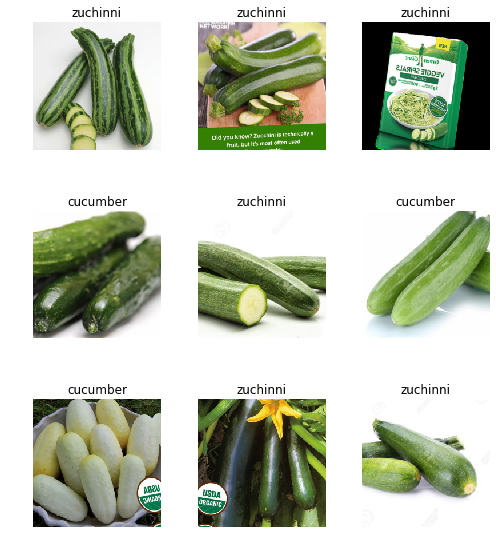

In [25]:
data.show_batch(rows=3, figsize=(7,8))

In [26]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds) # here the validation is just mere 20%

(['cucumber', 'zuchinni'], 2, 334, 83)

Let's train our model

In [28]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)